In [1]:
from csoundengine import *

In [2]:
e = Engine()
s = e.session()




--Csound version 6.19 (double samples) Oct 30 2023
[commit: 79e5d31bea441e5289073319ab2b1e42d01814b9]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


In [3]:
s.defInstr('sine', r'''
|iamp=0.1, kfreq=1000|
a0 = oscili:a(iamp, lag:k(kfreq, 0.1))
a0 *= cossegr:a(0, 0.01, 1, 0.1, 0)
outch 1, a0
''')

Instr(sine, iamp:5=0.1, kfreq:6=1000)

In [4]:
ev = s.sched('sine', 0, 4, kfreq=442, iamp=0.2)
ev.set('kfreq', 800, delay=2)
ev

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ sine=501.0002 start=2.089 dur=4.000 p4=0.2 iamp=442)

UnifiedCSD:  /tmp/tmp624cld9z.csd
instr _releaseDynargsToken uses instrument number 1
instr _stop uses instrument number 2
instr _setControl uses instrument number 3
instr _initDynamicControls uses instrument number 4
instr _automateControlViaPargs uses instrument number 5
instr _automatePargViaPargs uses instrument number 6
instr _pwrite uses instrument number 7
instr _chnset uses instrument number 8
PSET: isname="_initDynamicControls", pmax=5

Elapsed time at end of orchestra compile: real: 0.012s, CPU: 0.012s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.012s, CPU: 0.012s
--Csound version 6.19 (double samples) Oct 30 2023
[commit: 79e5d31bea441e5289073319ab2b1e42d01814b9]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
Strsets[20]: 'linear'
ftable 101:
ftable 101:	100000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 poi

RenderJob(outfile='/home/em/tmp/sine.wav', samplerate=44100, encoding='', starttime=0.0, endtime=4.0, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/home/em/tmp/si...>)
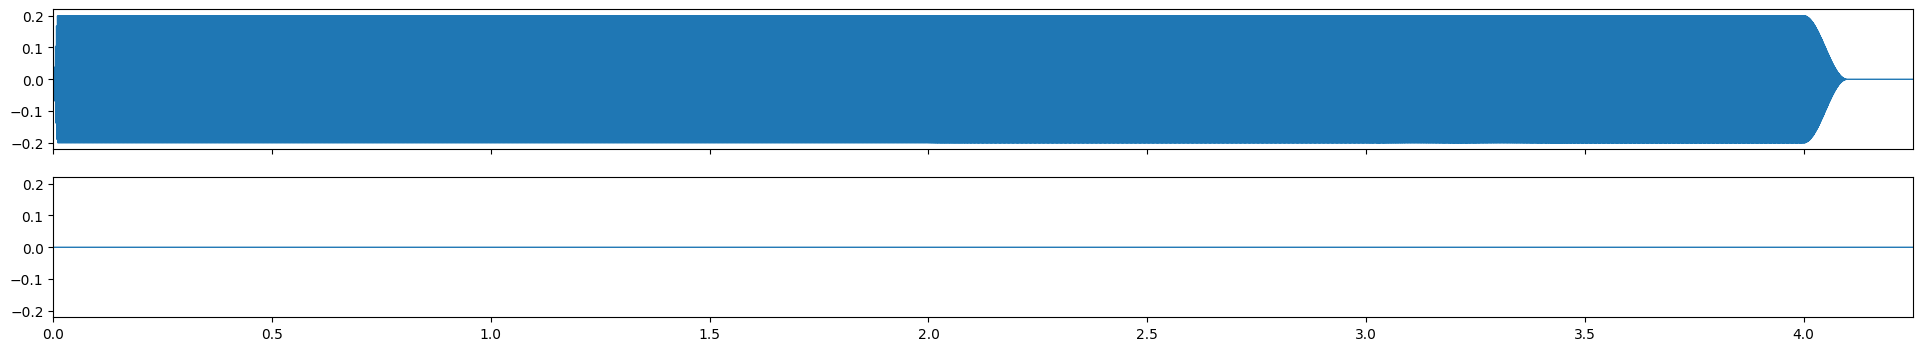

In [5]:
r = s.makeRenderer()
event = r.sched('sine', 0, 4, kfreq=442, iamp=0.2)
event.set(kfreq=800, delay=2)
event.automate("kfreq", (0, 1000, 0.1, 500, 0.2, 1000, 0.3, 500, 0.4, 1000), delay=3, overtake=True)
r.writeCsd('~/tmp/sine.csd')
r.render('~/tmp/sine.wav', tail=0.25)

UnifiedCSD:  /tmp/tmp20axd5pi.csd
instr _releaseDynargsToken uses instrument number 1
instr _stop uses instrument number 2
instr _setControl uses instrument number 3
instr _initDynamicControls uses instrument number 4
instr _automateControlViaPargs uses instrument number 5
instr _automatePargViaPargs uses instrument number 6
instr _pwrite uses instrument number 7
instr _chnset uses instrument number 8
PSET: isname="_initDynamicControls", pmax=5

Elapsed time at end of orchestra compile: real: 0.015s, CPU: 0.015s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.016s, CPU: 0.015s
--Csound version 6.19 (double samples) Oct 30 2023
[commit: 79e5d31bea441e5289073319ab2b1e42d01814b9]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
Strsets[20]: 'linear'
ftable 101:
ftable 101:	100000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 poi


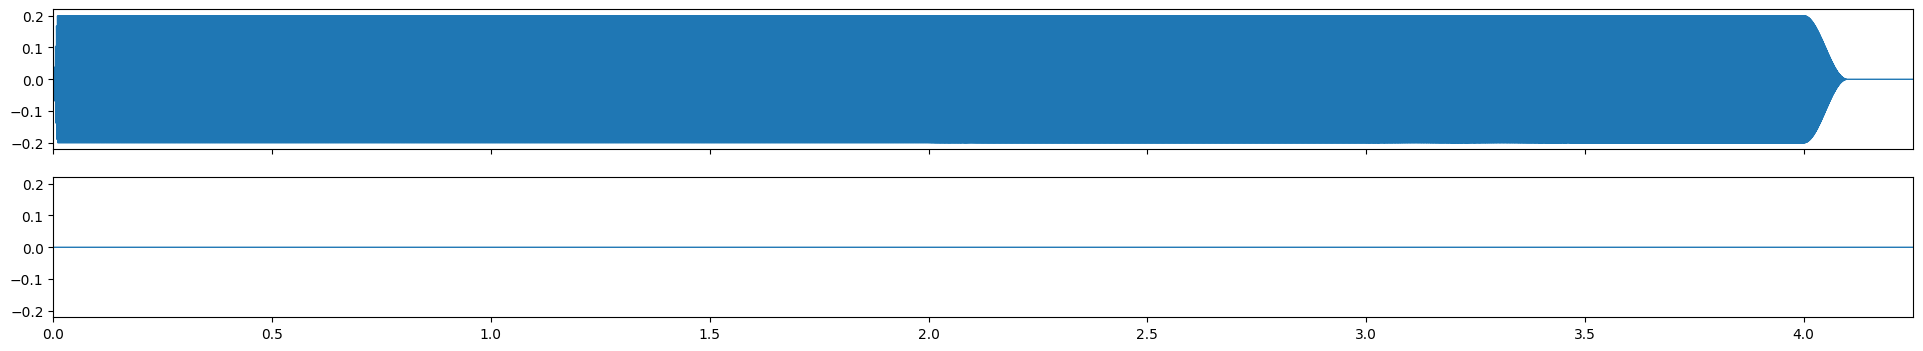

In [6]:
with s.rendering(tail=0.25) as r:
    event = s.sched('sine', 0, 4, kfreq=442, iamp=0.2)
    event.set(kfreq=800, delay=2)
    event.automate("kfreq", (0, 1000, 0.1, 500, 0.2, 1000, 0.3, 500, 0.4, 1000), delay=3, overtake=True)
r